In [538]:
from sklearn.datasets import fetch_kddcup99
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [539]:
kddcup = fetch_kddcup99(subset='SA', percent10=True)
kddcup

{'data': array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        ..., 
        [0, b'icmp', b'ecr_i', ..., 0.0, 0.0, 0.0],
        [0, b'icmp', b'ecr_i', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'private', ..., 1.0, 0.0, 0.0]], dtype=object),
 'target': array([b'normal.', b'normal.', b'normal.', ..., b'smurf.', b'smurf.',
        b'neptune.'], dtype=object)}

In [540]:
X, y = kddcup["data"], kddcup["target"]

In [541]:
Xframe = pd.DataFrame(X)
yframe = pd.DataFrame(y)
Xframe.columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]

In [542]:
Xframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,9,1,0,0.11,0,0,0,0,0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,19,1,0,0.05,0,0,0,0,0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,29,1,0,0.03,0,0,0,0,0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,39,1,0,0.03,0,0,0,0,0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,49,1,0,0.02,0,0,0,0,0


In [543]:
Xframe.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,100655,100655,100655,100655,100655,100655,100655,100655,100655,100655,...,100655,100655,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0
unique,2353,3,49,9,3249,10688,2,3,2,20,...,256,256,101.0,99.0,101.0,57.0,93.0,55.0,101.0,101.0
top,0,b'tcp',b'http',b'SF',105,0,0,0,0,0,...,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,88961,77758,61902,94165,7370,17553,100653,100643,100654,100095,...,43250,57532,65256.0,64459.0,33741.0,50668.0,95047.0,94507.0,91146.0,91234.0


In [544]:
from sklearn.model_selection import train_test_split

train_x, test_x = train_test_split(Xframe, test_size=0.2, random_state=42)
train_y, test_y = train_test_split(yframe, test_size=0.2, random_state=42)

In [545]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80524 entries, 10595 to 15795
Data columns (total 41 columns):
duration                       80524 non-null object
protocol_type                  80524 non-null object
service                        80524 non-null object
flag                           80524 non-null object
src_bytes                      80524 non-null object
dst_bytes                      80524 non-null object
land                           80524 non-null object
wrong_fragment                 80524 non-null object
urgent                         80524 non-null object
hot                            80524 non-null object
num_failed_logins              80524 non-null object
logged_in                      80524 non-null object
num_compromised                80524 non-null object
root_shell                     80524 non-null object
su_attempted                   80524 non-null object
num_root                       80524 non-null object
num_file_creations             80524 no

In [546]:
train_x = train_x.apply(pd.to_numeric, errors='ignore')

In [547]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80524 entries, 10595 to 15795
Data columns (total 41 columns):
duration                       80524 non-null int64
protocol_type                  80524 non-null object
service                        80524 non-null object
flag                           80524 non-null object
src_bytes                      80524 non-null int64
dst_bytes                      80524 non-null int64
land                           80524 non-null int64
wrong_fragment                 80524 non-null int64
urgent                         80524 non-null int64
hot                            80524 non-null int64
num_failed_logins              80524 non-null int64
logged_in                      80524 non-null int64
num_compromised                80524 non-null int64
root_shell                     80524 non-null int64
su_attempted                   80524 non-null int64
num_root                       80524 non-null int64
num_file_creations             80524 non-null int64


In [548]:
protocol_type = train_x.protocol_type
service = train_x.service
flag = train_x.flag

train_x = train_x.drop(['protocol_type', 'service', 'flag'], axis=1)

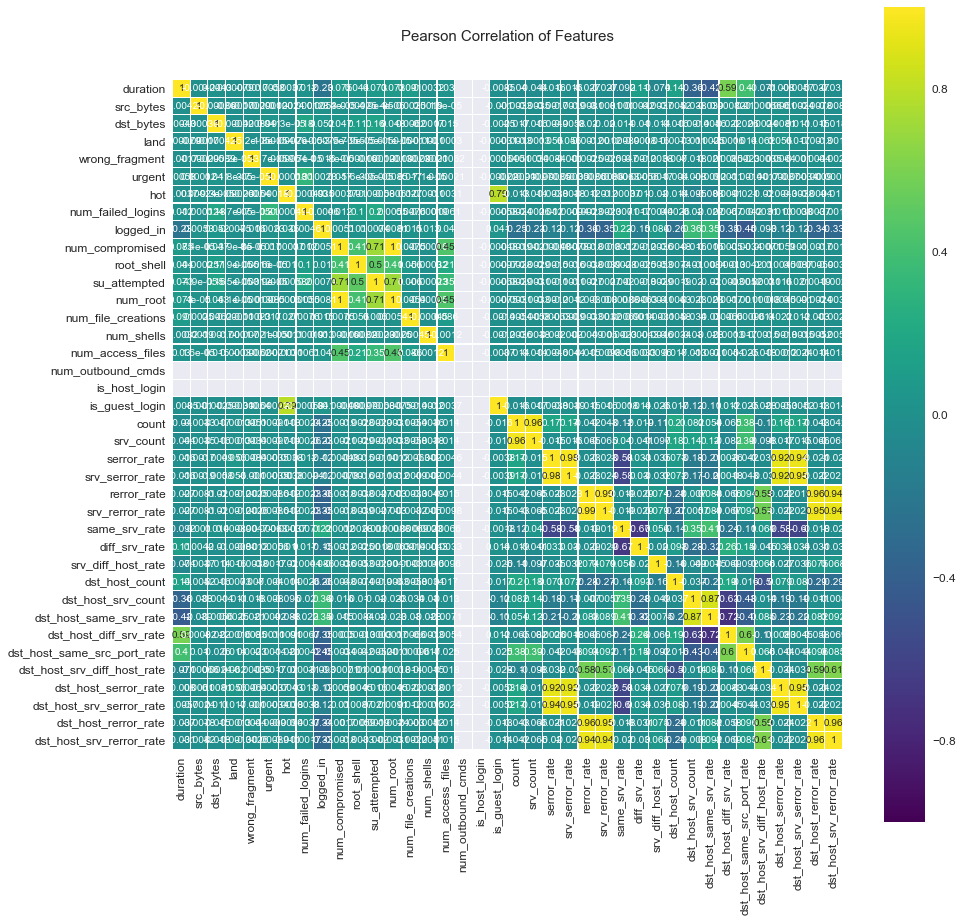

In [549]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_x.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [550]:
# Correlations:
# (dst_host_serror_rate, serror_rate, srv_serror_rate, dst_host_srv_serror_rate)
# (rerror_rate, srv_rerror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate)
# (count, srv_count)
# (num_root, num_compromised)
# (dest_host_srv_count, dst_host_same_srv_rate)
# (is_guest_login, hot)

train_x = train_x.drop(['dst_host_srv_serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'srv_count', 'num_compromised', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_count', 'is_guest_login'], axis=1)

In [551]:
train_x.is_host_login.value_counts()

0    80524
Name: is_host_login, dtype: int64

In [552]:
train_x.num_outbound_cmds.value_counts()

0    80524
Name: num_outbound_cmds, dtype: int64

In [553]:
# Vidimo iz prethodne dve komande da oba imaju vrednost 0 u svim slucajevima, te mozemo da ih izbacimo
train_x = train_x.drop(['is_host_login', 'num_outbound_cmds'], axis=1)

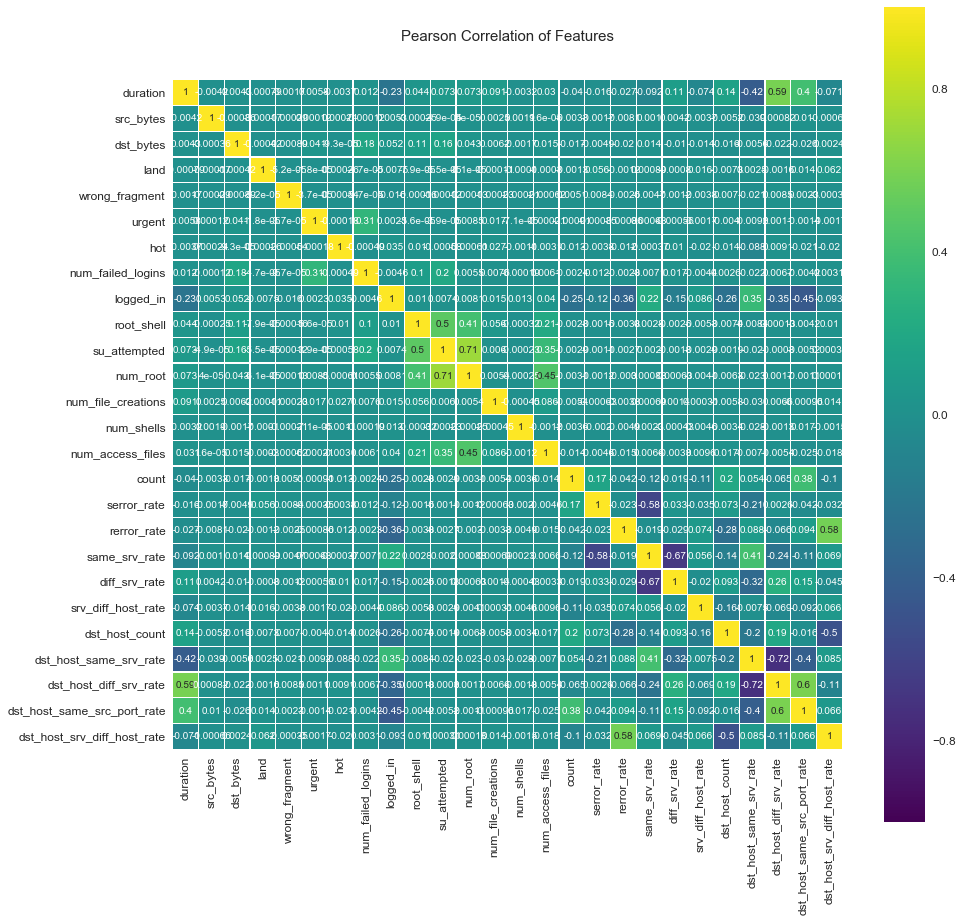

In [554]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_x.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [555]:
# Vidimo da nema vise jakih korelacija, dakle moze da se nastavi obrada

In [556]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
protocol_1hot = encoder.fit_transform(protocol_type)
protocol_1hot

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [557]:
print(encoder.classes_)

[b'icmp' b'tcp' b'udp']


In [558]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() 
protocol_1hot = encoder.fit_transform(protocol_1hot.reshape(-1,1))
protocol_1hot.toarray()

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

In [559]:
encoder = LabelEncoder()
service_1hot = encoder.fit_transform(service)
service_1hot

array([18, 18, 29, ..., 18, 18, 18], dtype=int64)

In [560]:
encoder = OneHotEncoder()
service_1hot = encoder.fit_transform(service_1hot.reshape(-1,1))
service_1hot.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [561]:
service_1hot.toarray().shape

(80524, 47)

In [562]:
encoder = LabelEncoder()
flag_1hot = encoder.fit_transform(flag)
flag_1hot

array([8, 8, 8, ..., 1, 8, 8], dtype=int64)

In [563]:
encoder = OneHotEncoder()
flag_1hot = encoder.fit_transform(flag_1hot.reshape(-1,1))
flag_1hot.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [564]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_1hot = encoder.fit_transform(train_y.values.ravel())
y_1hot

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [565]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x, y_1hot)

In [566]:
train_x_prepared = np.c_[train_x_scaled, protocol_1hot.toarray(), service_1hot.toarray(), flag_1hot.toarray()]

In [567]:
train_x_prepared.shape

(80524, 85)

In [568]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score

classifier = GaussianNB()
cross_val_score(classifier, train_x_prepared, y_1hot, cv=3, scoring='accuracy')

array([ 0.97597497,  0.97559522,  0.97719651])

In [569]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=5)
cross_val_score(classifier, train_x_prepared, y_1hot, cv=3, scoring='accuracy')

array([ 0.99921779,  0.99962741,  0.99955287])

In [570]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
cross_val_score(classifier, train_x_prepared, y_1hot, cv=3, scoring='accuracy')

array([ 0.96595523,  0.97447744,  0.9662419 ])

In [571]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear", C=0.025)
cross_val_score(classifier, train_x_prepared, y_1hot, cv=3, scoring='accuracy')

array([ 0.99929229,  0.99955289,  0.99951561])

In [572]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(alpha=1)
cross_val_score(classifier, train_x_prepared, y_1hot, cv=3, scoring='accuracy')

array([ 0.9989943 ,  0.9991803 ,  0.99918027])

In [573]:
# Vidimo da metode sa SV, DecisionTree i MLP imaju najbolje rezultate sto se tice preciznosti
# Ali u ovom slucaju jos bitnije od pravilnog nalazenja klasa jeste koliko ima "false positive"
# Odnosno koliko cesto bi ovaj nas algoritam obelezavao saobracaj kao "siguran - normal" kada on nije

In [574]:
# Pogledajmo kako je podelio klase rezultata OneHotEncoder

print(encoder.classes_)

[b'back.' b'buffer_overflow.' b'ipsweep.' b'land.' b'neptune.' b'normal.'
 b'pod.' b'portsweep.' b'satan.' b'smurf.' b'teardrop.' b'warezclient.']


In [575]:
# Vidimo da je normalan saobracaj na poziciji 5, te cemo pretvoriti label podataka da budu true u tom slucaju, a false u ostalim

y_1hot_bool = (y_1hot == 5)

In [576]:
# Sada probamo da nadjemo precission odnosno true_positive/true_positive+false_positive za tri najbolja klasifikatora

In [577]:
from sklearn.metrics import precision_score, recall_score
classifier = DecisionTreeClassifier(max_depth=5)
train_y_pred = cross_val_predict(classifier, train_x_prepared, y_1hot_bool, cv=3)
precision_score(y_1hot_bool, train_y_pred)

0.99948607256655364

In [578]:
classifier = SVC(kernel="linear", C=0.025)
train_y_pred = cross_val_predict(classifier, train_x_prepared, y_1hot_bool, cv=3)
precision_score(y_1hot_bool, train_y_pred)

0.99952458047439163

In [579]:
classifier = MLPClassifier(alpha=1)
train_y_pred = cross_val_predict(classifier, train_x_prepared, y_1hot_bool, cv=3)
precision_score(y_1hot_bool, train_y_pred)

0.999473143150861